<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="cognitiveclass.ai logo">
</center>


# Machine Learning Foundation

## Course 4, Part c: Clustering Methods LAB


# Clustering Methods Exercises


## Introduction

This lab uses a dataset on wine quality. The data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

We will be using the chemical properties (i.e. everything but quality and color) to cluster the wine. Though this is unsupervised learning, there are interesting semi-supervised extensions relating clustering results onto color and quality.


In [1]:
def warn(*args, **kwargs):
  pass

import warnings
warnings.warn = warn

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1

*   Import the data and examine the features.
*   Note which are continuous, categorical, and boolean.
*   How many entries are there for the two colors and range of qualities?
*   Make a histogram plot of the quality for each of the wine colors.


In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/Wine_Quality_Data.csv"

In [4]:
data = pd.read_csv(url)
data.head(4).T

0       1      2      3
fixed_acidity            7.4     7.8    7.8   11.2
volatile_acidity         0.7    0.88   0.76   0.28
citric_acid              0.0     0.0   0.04   0.56
residual_sugar           1.9     2.6    2.3    1.9
chlorides              0.076   0.098  0.092  0.075
free_sulfur_dioxide     11.0    25.0   15.0   17.0
total_sulfur_dioxide    34.0    67.0   54.0   60.0
density               0.9978  0.9968  0.997  0.998
pH                      3.51     3.2   3.26   3.16
sulphates               0.56    0.68   0.65   0.58
alcohol                  9.4     9.8    9.8    9.8
quality                    5       5      5      6
color                    red     red    red    red

In [5]:
data.shape

(6497, 13)

The data types for each entry. The implementation of K-means in Scikit-learn is designed only to work with continuous data (even though it is sometimes used with categorical or boolean types). Fortunately, all the columns we will be using (everything except quality and color) are continuous.


In [6]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

The number of entries for each wine color.


In [7]:
data.color.value_counts()

color
white    4898
red      1599
Name: count, dtype: int64

The distribution of quality values.


In [8]:
data.quality.value_counts().sort_index()

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

Now for the histogram.


In [9]:
# set seaborn configuration
sns.set_context('notebook')
sns.set_style('white')

In [10]:
# custom colors
red = sns.color_palette()[3] # represent for red wine
red

(0.8392156862745098, 0.15294117647058825, 0.1568627450980392)

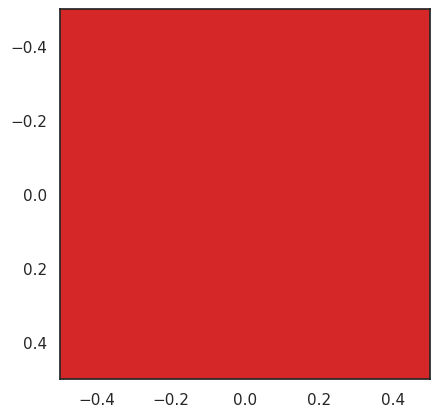

In [11]:
# Rematch the color
plt.imshow([[red]])

In [12]:
purple = sns.color_palette()[4] # represent for white wine
purple

(0.5803921568627451, 0.403921568627451, 0.7411764705882353)

In [13]:
# Set bins for histogram
bin_range = np.array([3,4,5,6,7,8,9])

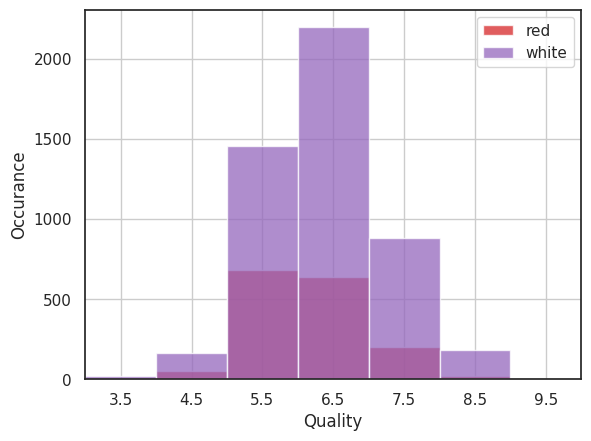

In [14]:
# Plot histogram of quality counts for red and white wines
ax = plt.axes()
for color, plot_color in zip(['red', 'white'], [red, purple]):
  # Assign data based on colors
  q_data = data.loc[data.color==color, 'quality'] # quality data
  q_data.hist(bins = bin_range,
              alpha = 0.75,
              ax = ax,
              color = plot_color,
              label = color)

  ax.legend()
  ax.set(xlabel = 'Quality',
         ylabel = 'Occurance')
  # Force tick labels to be in the middle of region
  ax.set_xlim(3, 10)
  ax.set_xticks(bin_range + 0.5)
  # ax.set_xticklabels(bin_range);
  ax.grid('off')

## Question 2

*   Examine the correlation and skew of the relevant variables--everything except color and quality (without dropping these columns from our data).
*   Perform any appropriate feature transformations and/or scaling.
*   Examine the pairwise distribution of the variables with pairplots to verify scaling and normalization efforts.


In [15]:
float_cols = [x for x in data.columns if x not in ['color','quality']]
float_cols

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [16]:
# The other way
data.select_dtypes(include='float').columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [17]:
# The other way
data.iloc[:,:-2].columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [18]:
# Correlation matrix
corr_mtx = data[float_cols].corr()
corr_mtx

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity              -0.111981   0.298195            -0.282735   
volatile_acidity           -0.196011   0.377124            -0.352557   
citric_acid                 0.142451   0.038998             0.133126   
residual_sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free_sulfur_dioxide         0.402871  -0.195045             1.000000   
total_sulfur_dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile_acidity                 -0.414476  0.271296  0.261454   0.225984   
citric_acid                       0.195242  0.096154 -0.329808   0.056197   
residual_sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free_sulfur_dioxide               0.720934  0.025717 -0.145854  -0.188457   
total_sulfur_dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   

                       alcohol  
fixed_acidity        -0.095452  
volatile_acidity     -0.037640  
citric_acid          -0.010493  
residual_sugar       -0.359415  
chlorides            -0.256916  
free_sulfur_dioxide  -0.179838  
total_sulfur_dioxide -0.265740  
density              -0.686745  
pH                    0.121248  
sulphates            -0.003029  
alcohol               1.000000

In [19]:
# Strip out the diagonal values for the next step
for x in range(len(float_cols)):
  corr_mtx.iloc[x, x] = 0.0

corr_mtx

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              0.000000          0.219008     0.324436   
volatile_acidity           0.219008          0.000000    -0.377981   
citric_acid                0.324436         -0.377981     0.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity              -0.111981   0.298195            -0.282735   
volatile_acidity           -0.196011   0.377124            -0.352557   
citric_acid                 0.142451   0.038998             0.133126   
residual_sugar              0.000000  -0.128940             0.402871   
chlorides                  -0.128940   0.000000            -0.195045   
free_sulfur_dioxide         0.402871  -0.195045             0.000000   
total_sulfur_dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile_acidity                 -0.414476  0.271296  0.261454   0.225984   
citric_acid                       0.195242  0.096154 -0.329808   0.056197   
residual_sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free_sulfur_dioxide               0.720934  0.025717 -0.145854  -0.188457   
total_sulfur_dioxide              0.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  0.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  0.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   0.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   

                       alcohol  
fixed_acidity        -0.095452  
volatile_acidity     -0.037640  
citric_acid          -0.010493  
residual_sugar       -0.359415  
chlorides            -0.256916  
free_sulfur_dioxide  -0.179838  
total_sulfur_dioxide -0.265740  
density              -0.686745  
pH                    0.121248  
sulphates            -0.003029  
alcohol               0.000000

In [20]:
# Output maximum values of each columns
corr_mtx.abs().idxmax()

fixed_acidity                        density
volatile_acidity        total_sulfur_dioxide
citric_acid                 volatile_acidity
residual_sugar                       density
chlorides                          sulphates
free_sulfur_dioxide     total_sulfur_dioxide
total_sulfur_dioxide     free_sulfur_dioxide
density                              alcohol
pH                               citric_acid
sulphates                          chlorides
alcohol                              density
dtype: object

And an examination of the skew values in anticipation of transformations.


In [21]:
data[float_cols].skew()

fixed_acidity           1.723290
volatile_acidity        1.495097
citric_acid             0.471731
residual_sugar          1.435404
chlorides               5.399828
free_sulfur_dioxide     1.220066
total_sulfur_dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
dtype: float64

In [22]:
skew_cols = (data[float_cols].skew().sort_values(ascending=False))
skew_cols

chlorides               5.399828
sulphates               1.797270
fixed_acidity           1.723290
volatile_acidity        1.495097
residual_sugar          1.435404
free_sulfur_dioxide     1.220066
alcohol                 0.565718
density                 0.503602
citric_acid             0.471731
pH                      0.386839
total_sulfur_dioxide   -0.001177
dtype: float64

In [23]:
skew_cols > 0.75

chlorides                True
sulphates                True
fixed_acidity            True
volatile_acidity         True
residual_sugar           True
free_sulfur_dioxide      True
alcohol                 False
density                 False
citric_acid             False
pH                      False
total_sulfur_dioxide    False
dtype: bool

In [24]:
skew_cols = skew_cols.loc[skew_cols > 0.75]
skew_cols

chlorides              5.399828
sulphates              1.797270
fixed_acidity          1.723290
volatile_acidity       1.495097
residual_sugar         1.435404
free_sulfur_dioxide    1.220066
dtype: float64

In [25]:
skew_cols = skew_cols.index.tolist()
skew_cols

['chlorides',
 'sulphates',
 'fixed_acidity',
 'volatile_acidity',
 'residual_sugar',
 'free_sulfur_dioxide']

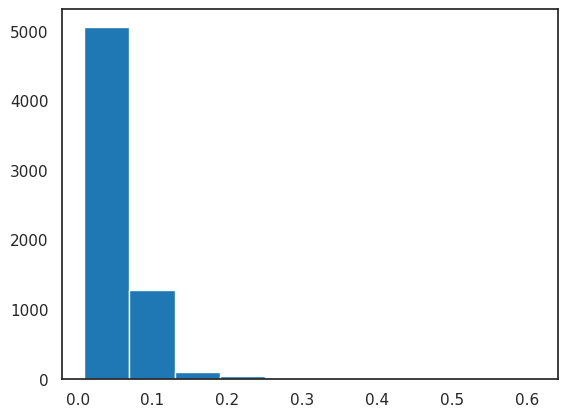

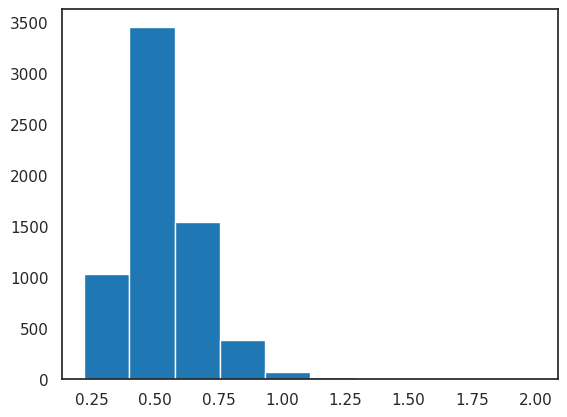

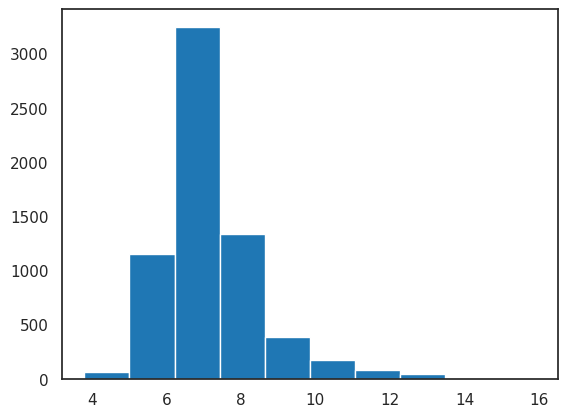

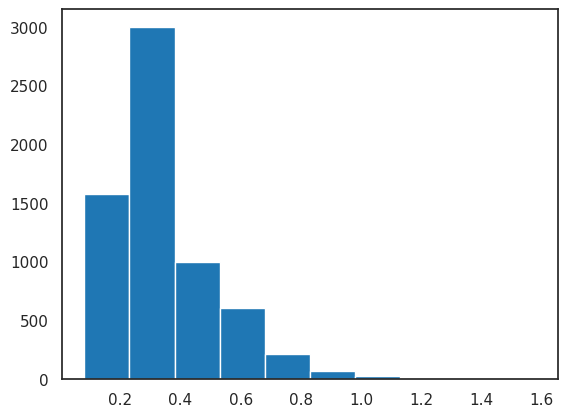

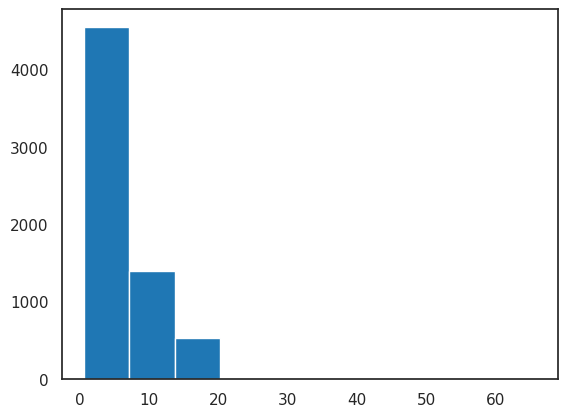

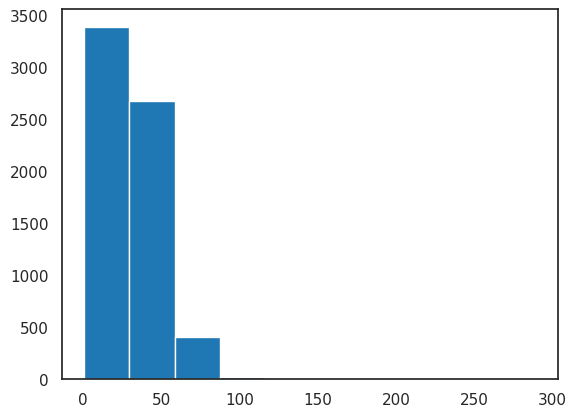

In [26]:
# Before log transformation
for col in skew_cols:
  plt.hist(data[col])
  plt.show()

In [27]:
# Perform log transformation on skewed columns
for col in skew_cols:
  data[col] = np.log1p(data[col])

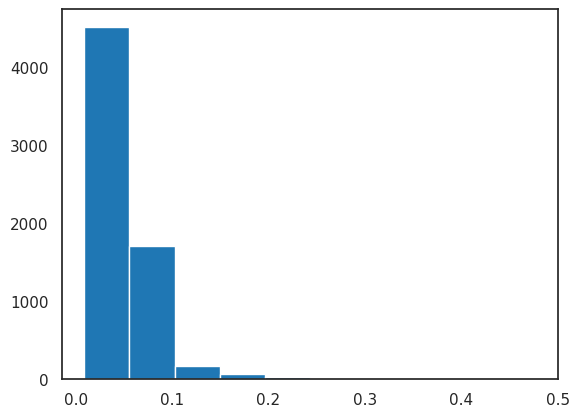

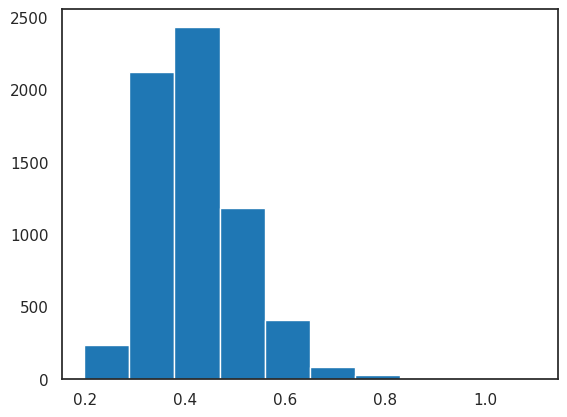

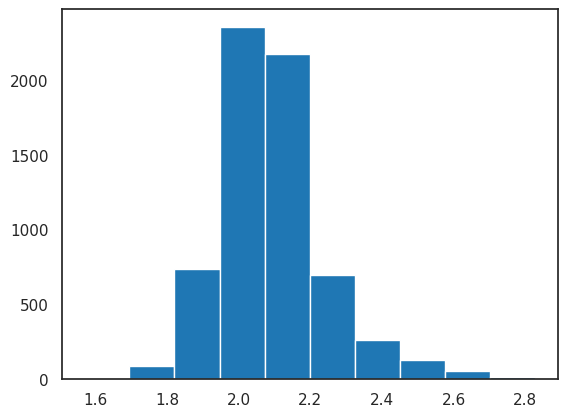

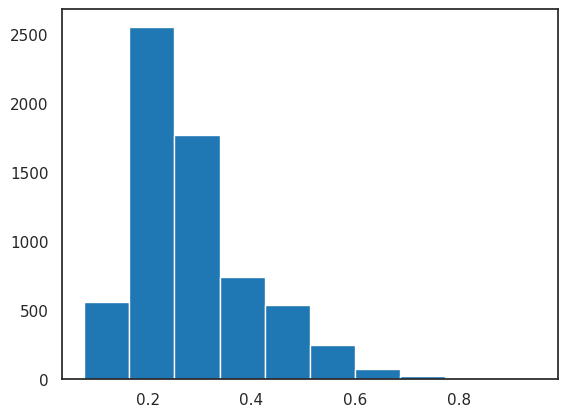

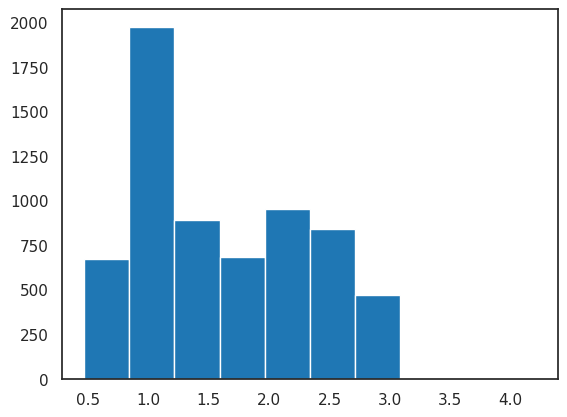

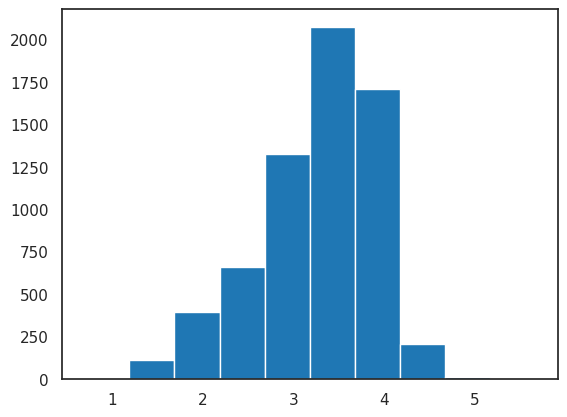

In [28]:
# After log transformation
for col in skew_cols:
  plt.hist(data[col])
  plt.show()

In [29]:
data.head(4).T

0         1         2         3
fixed_acidity         2.128232  2.174752  2.174752  2.501436
volatile_acidity      0.530628  0.631272  0.565314   0.24686
citric_acid                0.0       0.0      0.04      0.56
residual_sugar        1.064711  1.280934  1.193922  1.064711
chlorides              0.07325   0.09349  0.088011  0.072321
free_sulfur_dioxide   2.484907  3.258097  2.772589  2.890372
total_sulfur_dioxide      34.0      67.0      54.0      60.0
density                 0.9978    0.9968     0.997     0.998
pH                        3.51       3.2      3.26      3.16
sulphates             0.444686  0.518794  0.500775  0.457425
alcohol                    9.4       9.8       9.8       9.8
quality                      5         5         5         6
color                      red       red       red       red

Perform feature scaling.


In [30]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[float_cols] = sc.fit_transform(data[float_cols])
data.head(4).T

0         1         2         3
fixed_acidity         0.229509  0.550261  0.550261  2.802728
volatile_acidity      2.135767  3.012817  2.438032 -0.337109
citric_acid          -2.192833 -2.192833 -1.917553  1.661085
residual_sugar       -0.815173 -0.498175  -0.62574 -0.815173
chlorides             0.624554  1.281999  1.104012  0.594352
free_sulfur_dioxide  -1.193601 -0.013944 -0.754684 -0.574982
total_sulfur_dioxide -1.446359 -0.862469 -1.092486 -0.986324
density               1.034993  0.701486  0.768188  1.101694
pH                     1.81309 -0.115073   0.25812 -0.363868
sulphates             0.250355  1.059213  0.862549  0.389396
alcohol              -0.915464 -0.580068 -0.580068 -0.580068
quality                      5         5         5         6
color                      red       red       red       red

Finally, the pairplot of the transformed and scaled features.


In [31]:
data[float_cols + ['color']].head(4).T

0         1         2         3
fixed_acidity         0.229509  0.550261  0.550261  2.802728
volatile_acidity      2.135767  3.012817  2.438032 -0.337109
citric_acid          -2.192833 -2.192833 -1.917553  1.661085
residual_sugar       -0.815173 -0.498175  -0.62574 -0.815173
chlorides             0.624554  1.281999  1.104012  0.594352
free_sulfur_dioxide  -1.193601 -0.013944 -0.754684 -0.574982
total_sulfur_dioxide -1.446359 -0.862469 -1.092486 -0.986324
density               1.034993  0.701486  0.768188  1.101694
pH                     1.81309 -0.115073   0.25812 -0.363868
sulphates             0.250355  1.059213  0.862549  0.389396
alcohol              -0.915464 -0.580068 -0.580068 -0.580068
color                      red       red       red       red

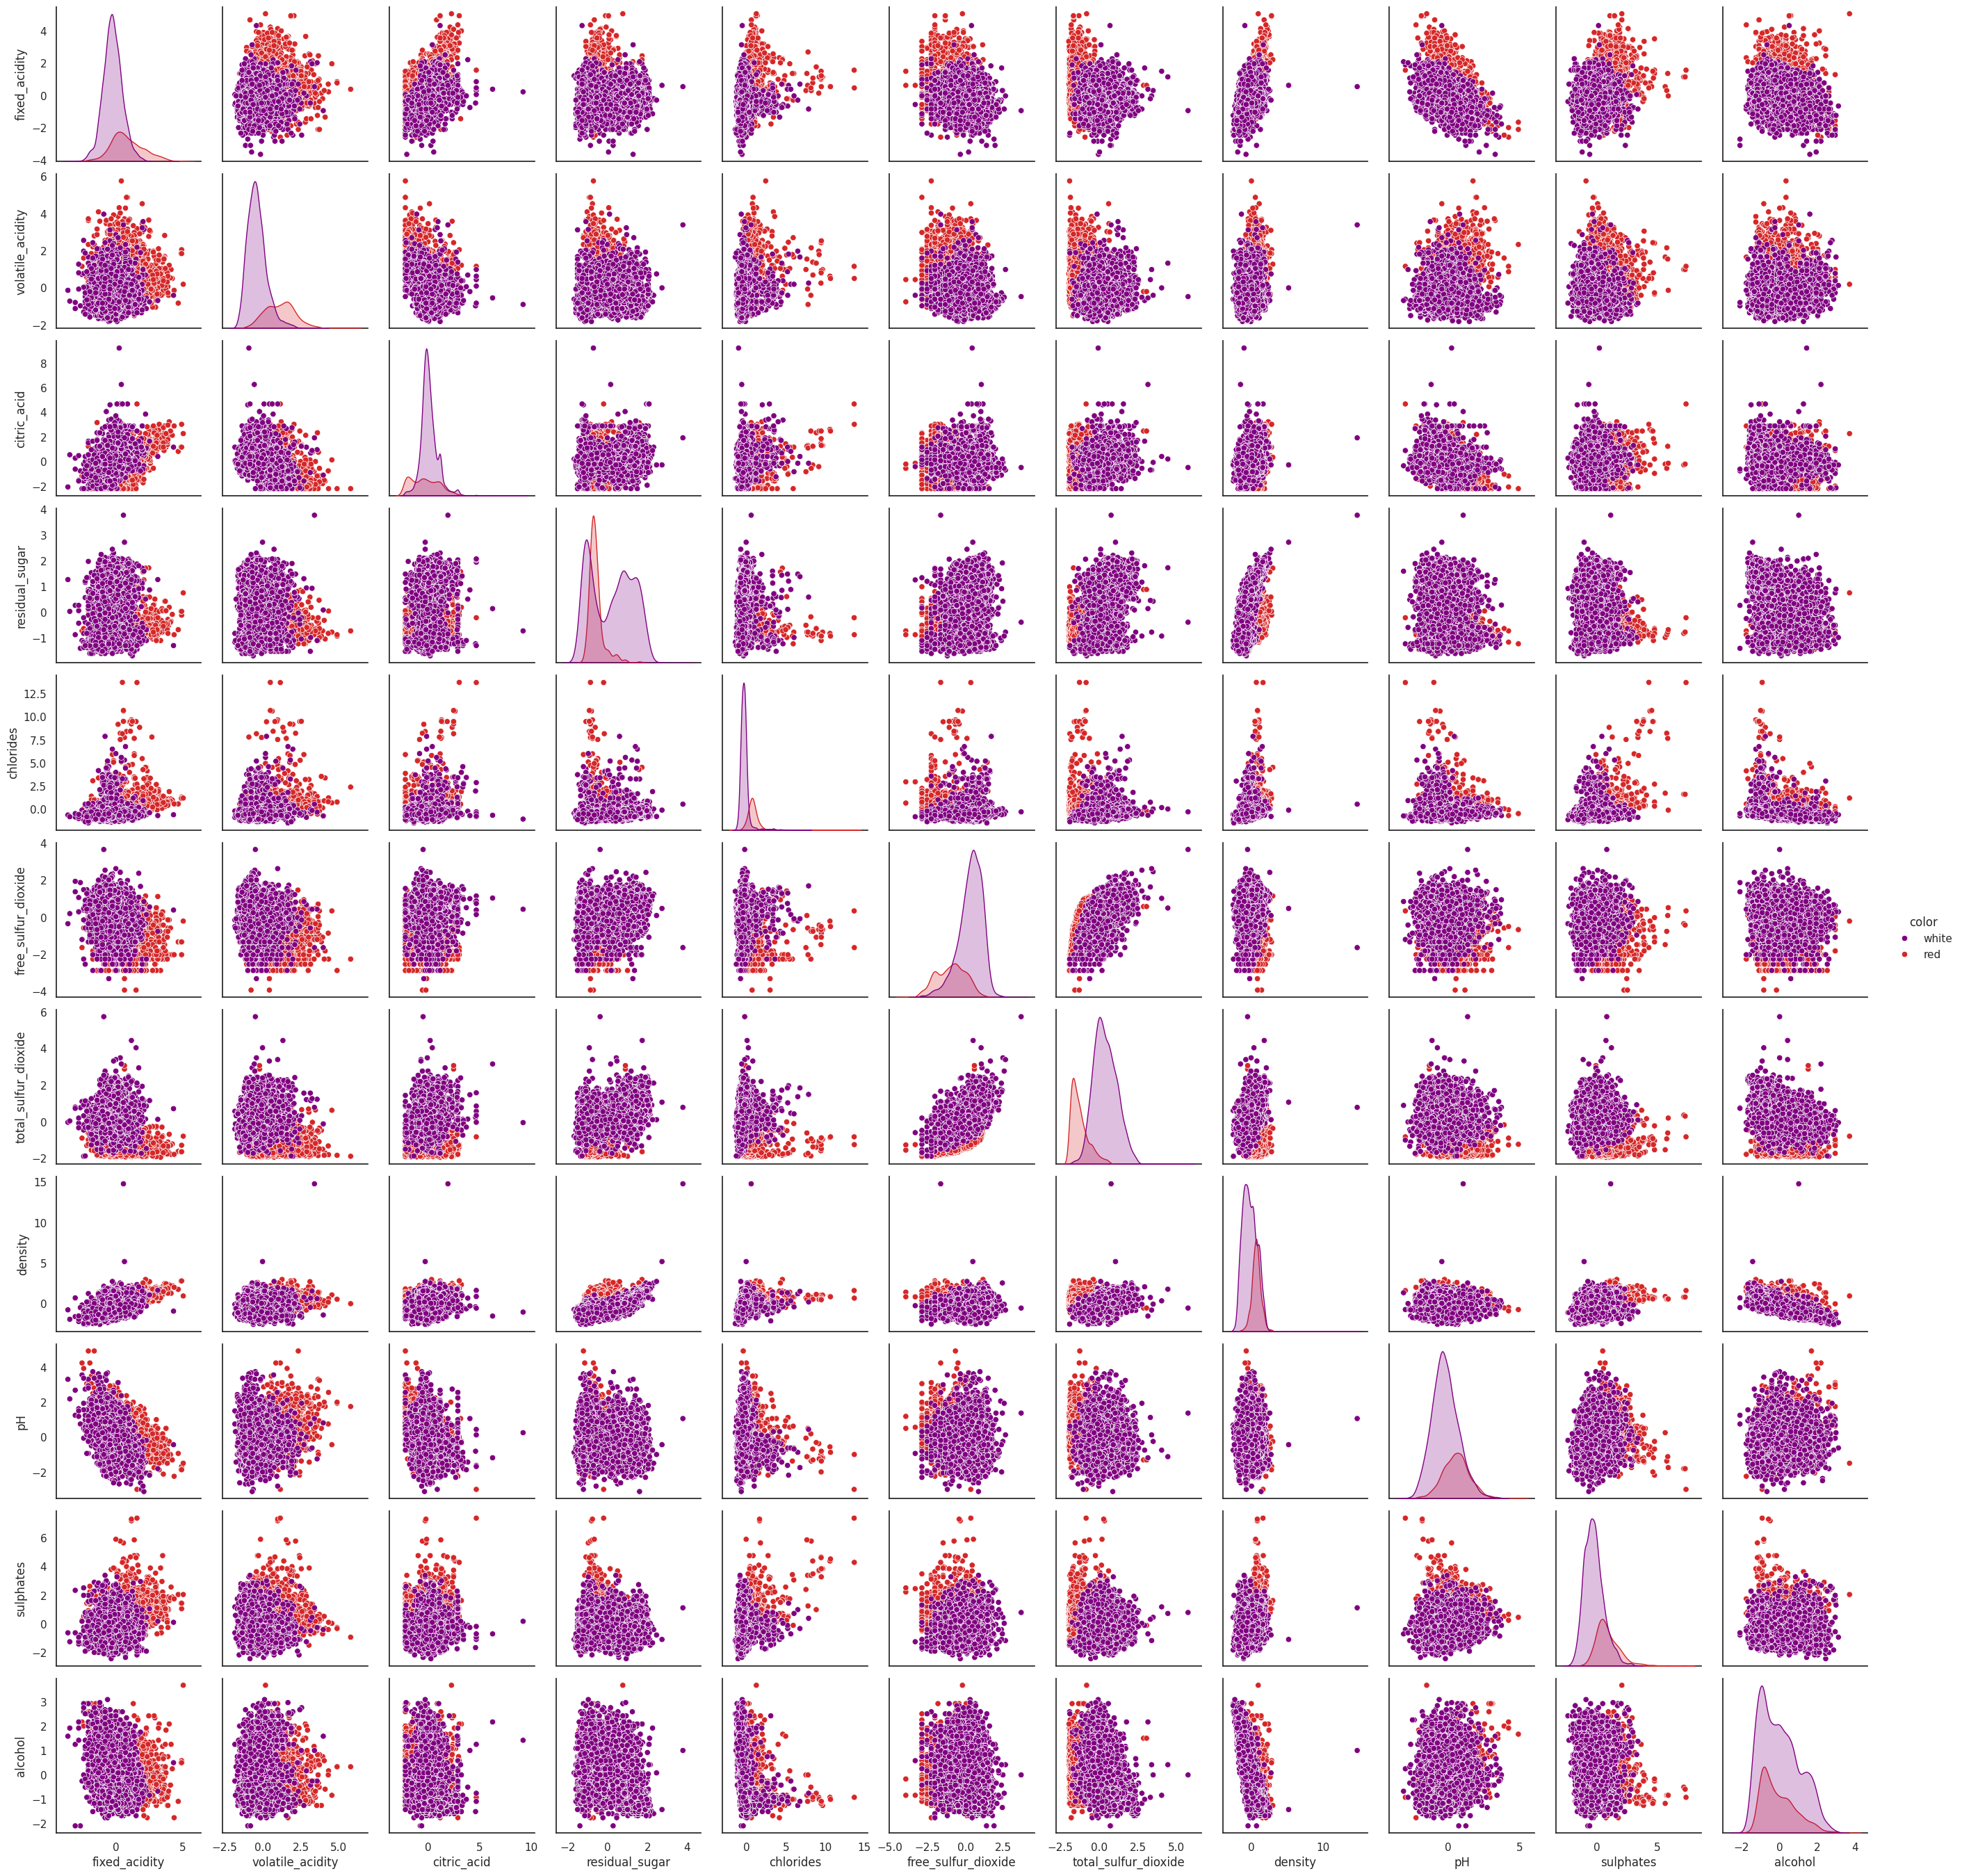

In [32]:
sns.set_context('notebook')
sns.pairplot(data[float_cols + ['color']],
             hue = 'color',
             hue_order = ['white', 'red'],
             palette = {'red': red, 'white': 'purple'})

## Question 3

*   Fit a K-means clustering model with two clusters.
*   Examine the clusters by counting the number of red and white wines in each cluster.


In [33]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=42)
km = km.fit(data[float_cols])
data['kmeans'] = km.predict(data[float_cols])

In [34]:
# Counting color of the wine under each cluster
(data[['color', 'kmeans']]          # select 2 columns
    .groupby(['kmeans','color'])    # groupby 2 columns
    .size()                         # check each value_counts
    .to_frame()                     # change as a dataframe
    .rename(columns={0:'number'}))  # rename the column

number
kmeans color        
0      red      1576
       white      87
1      red        23
       white    4811

## Question 4

*   Now fit K-Means models with cluster values ranging from 1 to 20.
*   For each model, store the number of clusters and the inertia value.
*   Plot cluster number vs inertia. Does there appear to be an ideal cluster number?


In [35]:
# Create and fit a range of models
km_list = list()

for clust in range(1, 21):
  km = KMeans(n_clusters=clust, random_state=42)
  km = km.fit(data[float_cols])

  km_list.append(pd.Series({'clusters': clust,
                            'inertia': km.inertia_,
                            'model': km}))
km_list

[clusters                                        1
 inertia                                   71467.0
 model       KMeans(n_clusters=1, random_state=42)
 dtype: object,
 clusters                                        2
 inertia                              55455.981113
 model       KMeans(n_clusters=2, random_state=42)
 dtype: object,
 clusters                                        3
 inertia                              45199.884066
 model       KMeans(n_clusters=3, random_state=42)
 dtype: object,
 clusters                                        4
 inertia                               42548.10948
 model       KMeans(n_clusters=4, random_state=42)
 dtype: object,
 clusters                                        5
 inertia                               38232.26978
 model       KMeans(n_clusters=5, random_state=42)
 dtype: object,
 clusters                                        6
 inertia                              36369.052743
 model       KMeans(n_clusters=6, random_state=42)
 d

In [36]:
# Concatenate all series data from the list and transpose
pd.concat(km_list, axis=1).T

clusters       inertia                                   model
0         1       71467.0   KMeans(n_clusters=1, random_state=42)
1         2  55455.981113   KMeans(n_clusters=2, random_state=42)
2         3  45199.884066   KMeans(n_clusters=3, random_state=42)
3         4   42548.10948   KMeans(n_clusters=4, random_state=42)
4         5   38232.26978   KMeans(n_clusters=5, random_state=42)
5         6  36369.052743   KMeans(n_clusters=6, random_state=42)
6         7  35089.418765   KMeans(n_clusters=7, random_state=42)
7         8  33923.534961                 KMeans(random_state=42)
8         9  31996.422967   KMeans(n_clusters=9, random_state=42)
9        10  31070.250442  KMeans(n_clusters=10, random_state=42)
10       11   30004.19102  KMeans(n_clusters=11, random_state=42)
11       12  29276.124095  KMeans(n_clusters=12, random_state=42)
12       13  28594.215464  KMeans(n_clusters=13, random_state=42)
13       14  27956.453149  KMeans(n_clusters=14, random_state=42)
14       15  27229.576075  KMeans(n_clusters=15, random_state=42)
15       16  26780.184036  KMeans(n_clusters=16, random_state=42)
16       17  26095.426298  KMeans(n_clusters=17, random_state=42)
17       18   25687.27197  KMeans(n_clusters=18, random_state=42)
18       19  25328.710953  KMeans(n_clusters=19, random_state=42)
19       20  24956.146245  KMeans(n_clusters=20, random_state=42)

In [37]:
plot_data = (pd.concat(km_list, axis=1).T
                [['clusters','inertia']].set_index('clusters'))
plot_data

inertia
clusters              
1              71467.0
2         55455.981113
3         45199.884066
4          42548.10948
5          38232.26978
6         36369.052743
7         35089.418765
8         33923.534961
9         31996.422967
10        31070.250442
11         30004.19102
12        29276.124095
13        28594.215464
14        27956.453149
15        27229.576075
16        26780.184036
17        26095.426298
18         25687.27197
19        25328.710953
20        24956.146245

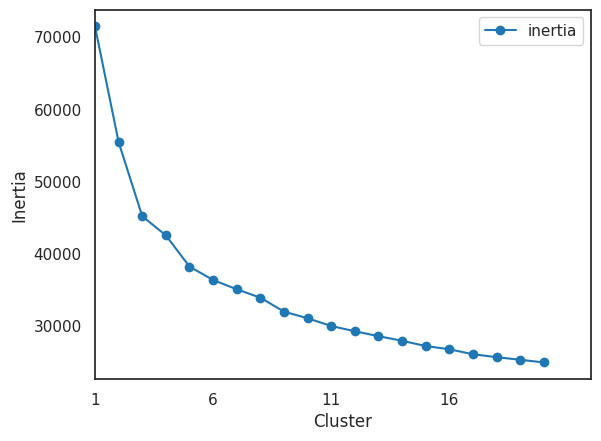

In [38]:
ax = plot_data.plot(marker='o', ls='-')
ax.set_xticks(range(0,21,1))
ax.set_xlim(0, 21)
ax.set(xlabel='Cluster', ylabel='Inertia')
plt.show()

## Question 5

*   Fit an agglomerative clustering model with two clusters.
*   Compare the results to those obtained by K-means with regards to wine color by reporting the number of red and white observations in each cluster for both K-means and agglomerative clustering.
*   Visualize the dendrogram produced by agglomerative clustering. *Hint:* SciPy has a module called [`cluster.hierarchy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01#module-scipy.cluster.hierarchy) that contains the `linkage` and `dendrogram` functions required to create the linkage map and plot the resulting dendrogram.


In [39]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2,              # end up with 2 clusters
                             linkage='ward',            # distance btw 2 clusters before merging
                             compute_full_tree = True)  # build entire hierarchy
ag.fit(data[float_cols])
data['agglom'] = ag.fit_predict(data[float_cols])

Note that cluster assignment is arbitrary, the respective primary cluster numbers for red and white may not be identical to the ones below and also may not be the same for both K-means and agglomerative clustering.


In [40]:
# First, for Agglomerative Clustering
(data[['color','agglom','kmeans']]
   .groupby(['color','agglom'])
   .size()
   .to_frame()
   .rename(columns={0: 'number'}))

number
color agglom        
red   0           31
      1         1568
white 0         4755
      1          143

In [41]:
# Second, compare with KMeans
(data[['color','agglom','kmeans']]
  .groupby(['color','kmeans'])
  .size()
  .to_frame()
  .rename(columns={0:'number'}))

number
color kmeans        
red   0         1576
      1           23
white 0           87
      1         4811

In [42]:
# Compare both results
(data[['color','agglom','kmeans']]
   .groupby(['color','agglom','kmeans'])
   .size()
   .to_frame()
   .rename(columns={0: 'number'}))

number
color agglom kmeans        
red   0      0           13
             1           18
      1      0         1563
             1            5
white 0      0           38
             1         4717
      1      0           49
             1           94

Though the cluster numbers are not identical, the clusters are very consistent within a single wine variety (red or white).

And here is a plot of the dendrogram created from agglomerative clustering.


In [43]:
ag.children_

array([[    0,     4],
       [  750,   751],
       [  753,  6498],
       ...,
       [12982, 12989],
       [12983, 12988],
       [12990, 12991]])

In [44]:
# First, import the cluster hierarchy module from SciPy to obtain the linkage and dendrogram function
from scipy.cluster import hierarchy
Z = hierarchy.linkage(ag.children_,
                      method='ward')
Z

array([[4.90000000e+01, 1.33600000e+03, 1.41421356e+00, 2.00000000e+00],
       [3.00000000e+00, 1.50000000e+01, 1.41421356e+00, 2.00000000e+00],
       [7.00000000e+00, 1.83000000e+03, 1.41421356e+00, 2.00000000e+00],
       ...,
       [1.29830000e+04, 1.29850000e+04, 1.70252597e+05, 2.78700000e+03],
       [1.29860000e+04, 1.29870000e+04, 2.13203272e+05, 3.70900000e+03],
       [1.29880000e+04, 1.29890000e+04, 4.71735321e+05, 6.49600000e+03]])

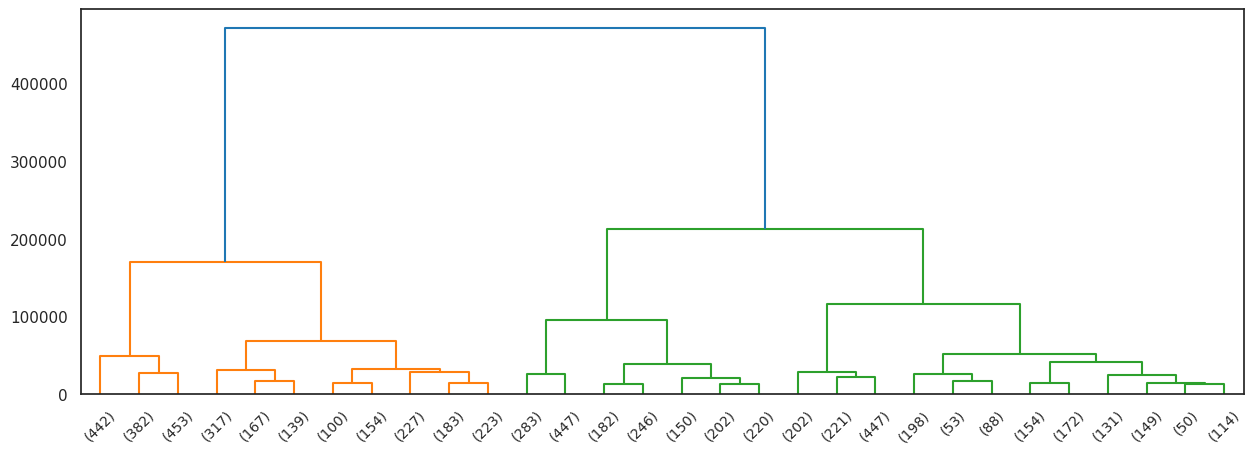

In [45]:
fig, ax = plt.subplots(figsize=(15,5))
den = hierarchy.dendrogram(Z,
                           orientation = 'top',       # display from top to bottom
                           p = 30,                    # show structure of the last 30 merges
                           truncate_mode = 'lastp',   # merged cluster will be shown in U-shape
                           show_leaf_counts = True,   # shows the number of original samples in each non-leaf node
                           ax = ax)                   # specifyg the axes object

## Question 6

In this question, we are going to explore clustering as a form of feature engineering.

*   Create a **binary** target variable `y`, denoting if the quality is greater than 7 or not.
*   Create a variable called `X_with_kmeans` from `data`, by dropping the columns "quality", "color" and "agglom" from the dataset. Create `X_without_kmeans` from that by dropping "kmeans".
*   For both datasets, using **[StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01)** with 10 splits, fit 10 Random Forest Classifiers and find the mean of the ROC-AUC scores from these 10 classifiers.
*   Compare the average roc-auc scores for both models, the one using the KMeans cluster as a feature and the one that doesn't use it.


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

y = (data['quality'] > 7).astype(int)
y

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: quality, Length: 6497, dtype: int64

In [47]:
X_with_kmeans =  data.drop(['agglom','color','quality'], axis=1)
X_without_kmeans = X_with_kmeans.drop('kmeans', axis=1)

In [48]:
X_without_kmeans.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.229509          2.135767    -2.192833       -0.815173   0.624554   
1       0.550261          3.012817    -2.192833       -0.498175   1.281999   
2       0.550261          2.438032    -1.917553       -0.625740   1.104012   
3       2.802728         -0.337109     1.661085       -0.815173   0.594352   
4       0.229509          2.135767    -2.192833       -0.815173   0.624554   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -1.193601             -1.446359  1.034993  1.813090   0.250355   
1            -0.013944             -0.862469  0.701486 -0.115073   1.059213   
2            -0.754684             -1.092486  0.768188  0.258120   0.862549   
3            -0.574982             -0.986324  1.101694 -0.363868   0.389396   
4            -1.193601             -1.446359  1.034993  1.813090   0.250355   

    alcohol  
0 -0.915464  
1 -0.580068  
2 -0.580068  
3 -0.580068  
4 -0.915464

In [49]:
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)
sss

StratifiedShuffleSplit(n_splits=10, random_state=6532, test_size=None,
            train_size=None)

In [50]:
list(sss.split(X_with_kmeans, y))

[(array([ 114, 5829, 4502, ..., 6490, 6165, 1938]),
  array([1575, 2151, 2392, 1165, 1069, 1846, 6053,  165, 2902, 4164, 6318,
         4811, 4448, 2191, 1851, 4182, 1363,  470, 5431,  984, 1874, 1882,
         4907, 2687, 1694, 5444,   59, 5901, 2426,  333, 1804, 2993, 1162,
          325, 3630, 3043, 6360, 6376,  889, 5428, 2146, 4738, 1222, 3055,
         3035, 3805, 3645, 3603, 2893, 5642, 3589,  946, 3754, 4815,  304,
         5993, 4655, 1280,  695, 5926, 2504,  584, 4015, 3818, 4567, 4609,
         5407, 4462, 2747,  213, 5879, 4985,  521, 6102, 2613, 5706, 3253,
         4056, 3577, 1908,  216,  759, 6396, 4260, 3351, 1397, 4234, 6022,
         2383, 1490, 5021, 2199, 4724, 4436, 6218, 4134, 1364, 3647, 4120,
         5085, 4499,  680, 2988, 2674, 3095, 4083, 3441,  845, 1667, 1321,
            4, 2136, 4510, 2900,  900, 5081, 4846, 5256, 1002, 3215, 5074,
         2946, 6204, 4476, 4696, 5704, 3422, 3013, 5002, 2976, 2281, 1040,
         5396, 3340, 2949, 1813, 1231, 5691, 648

In [59]:
def get_avg_roc_10splits(estimator, X, y):
  roc_auc_list = []
  for train_idx, test_idx in sss.split(X, y):
    # print(train_idx,"|", test_idx)
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    # print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    estimator.fit(X_train, y_train)
    y_predicted = estimator.predict(X_test)
    y_scored = estimator.predict_proba(X_test)[:, 1]
    roc_auc_list.append(roc_auc_score(y_test, y_scored))
  return np.mean(roc_auc_list)

estimator = RandomForestClassifier()   # create classification model
roc_with_kmeans = get_avg_roc_10splits(estimator, X_with_kmeans, y)
roc_without_kmeans = get_avg_roc_10splits(estimator, X_without_kmeans, y)

In [60]:
print("Without kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_without_kmeans))
print("Using kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_with_kmeans))

Without kmeans cluster as input to Random Forest, roc-auc is "0.9139880952380954"
Using kmeans cluster as input to Random Forest, roc-auc is "0.9110833333333334"


Let's now explore if the number of clusters have an effect in this improvement.

*   Create the basis training set from `data` by restricting to float_columns.
*   For $n = 1, \ldots, 20$, fit a KMeans algorithim with $n$ clusters. **[One-hot encode]()** it and add it to the **basis** training set. Don't add it to the previous iteration.
*   Fit 10 **Logistic Regression** models and compute the average roc-auc-score.
*   Plot the average roc-auc scores.


In [62]:
from sklearn.linear_model import LogisticRegression

In [68]:
X_basis = data[float_cols]
n_clusters = range(1, 21)

sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

def create_kmeans_columns(n):
  km = KMeans(n_clusters = n)
  km.fit(X_basis)
  km_col = pd.Series(km.predict(X_basis))
  # print(km_col)
  km_cols = pd.get_dummies(km_col, prefix='kmeans_cluster') # apply onehot encoding
  # print(km_cols)
  return pd.concat([X_basis, km_cols], axis=1)

In [70]:
create_kmeans_columns(2).head(4)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.229509          2.135767    -2.192833       -0.815173   0.624554   
1       0.550261          3.012817    -2.192833       -0.498175   1.281999   
2       0.550261          2.438032    -1.917553       -0.625740   1.104012   
3       2.802728         -0.337109     1.661085       -0.815173   0.594352   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -1.193601             -1.446359  1.034993  1.813090   0.250355   
1            -0.013944             -0.862469  0.701486 -0.115073   1.059213   
2            -0.754684             -1.092486  0.768188  0.258120   0.862549   
3            -0.574982             -0.986324  1.101694 -0.363868   0.389396   

    alcohol  kmeans_cluster_0  kmeans_cluster_1  
0 -0.915464             False              True  
1 -0.580068             False              True  
2 -0.580068             False              True  
3 -0.580068             False              True

In [71]:
estimator = LogisticRegression()
roc_auc_list = [get_avg_roc_10splits(estimator,
                                     create_kmeans_columns(n),
                                     y)
                for n in n_clusters]
roc_auc_list

[np.float64(0.7704603174603174),
 np.float64(0.7712698412698412),
 np.float64(0.7713968253968254),
 np.float64(0.7676666666666667),
 np.float64(0.7752380952380953),
 np.float64(0.7703809523809524),
 np.float64(0.7682460317460318),
 np.float64(0.7722777777777778),
 np.float64(0.7724206349206348),
 np.float64(0.7986190476190476),
 np.float64(0.7974523809523809),
 np.float64(0.7980634920634921),
 np.float64(0.7841666666666667),
 np.float64(0.814936507936508),
 np.float64(0.7823492063492063),
 np.float64(0.7797539682539683),
 np.float64(0.8034523809523808),
 np.float64(0.7944603174603175),
 np.float64(0.7833492063492064),
 np.float64(0.8018253968253969)]

In [72]:
len(roc_auc_list)

20

In [ ]:
ax = plt.axes()
ax.plot(ns, roc_auc_list)
ax.set(
    xticklabels= ns,
    xlabel='Number of clusters as features',
    ylabel='Average ROC-AUC over 10 iterations',
    title='KMeans + LogisticRegression'
)
ax.grid(True)

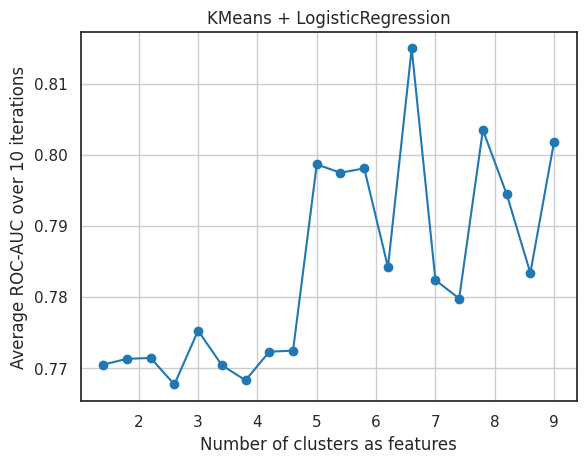

In [76]:
ax = plt.axes()
ax.plot(n_clusters, roc_auc_list, marker='o')
ax.set(xticklabels = n_clusters,
       xlabel = 'Number of clusters as features',
       ylabel = 'Average ROC-AUC over 10 iterations',
       title = 'KMeans + LogisticRegression')
ax.grid(True)

***

### Machine Learning Foundation (C) 2020 IBM Corporation
